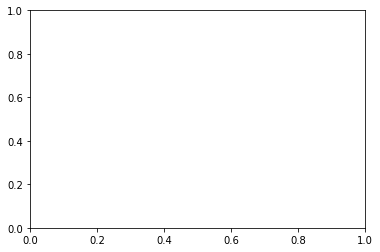

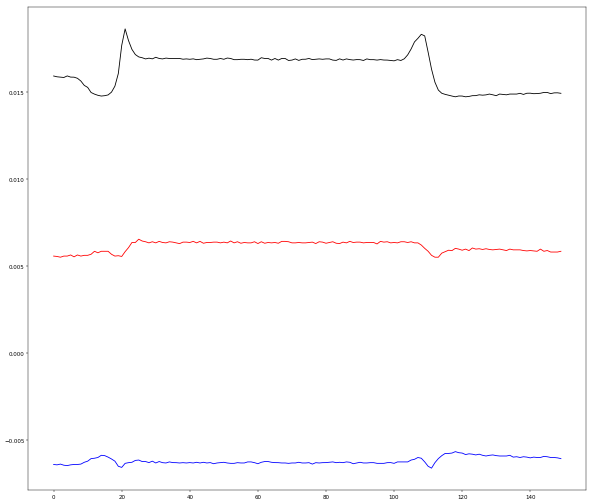

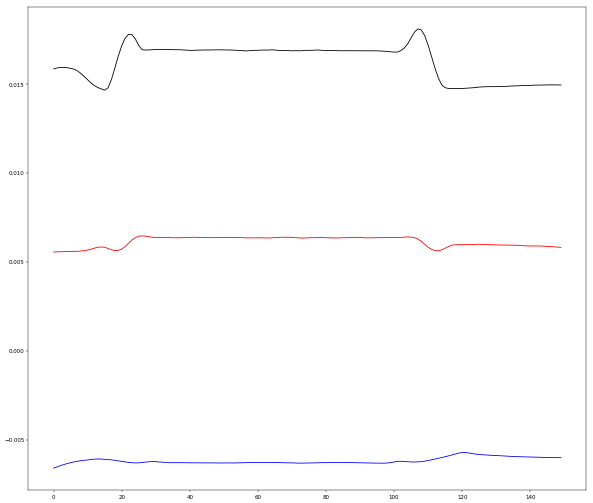

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

col_names = ['timestamp', 'X', 'Y', 'Z']
mag_data_referennce = pd.read_csv('./reference-fd-bw/mag.csv', names=col_names)

TMP_START = 0
TMP_END = 150

xaxis = list(range(len(mag_data_referennce)))[TMP_START:TMP_END]
x_reference = mag_data_referennce['X'][TMP_START:TMP_END]
# x_alt = savitzky_golay(list(x_reference), 31, 2)
y_reference = mag_data_referennce['Y'][TMP_START:TMP_END]
z_reference = mag_data_referennce['Z'][TMP_START:TMP_END]
fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_reference), color="blue", label="xaxis")
plt.plot(xaxis, np.rad2deg(y_reference), color="red", label="yaxis")
plt.plot(xaxis, np.rad2deg(z_reference), color="black", label="zaxis")
plt.show()


x_reference = savgol_filter(list(x_reference), 21, 2)
y_reference = savgol_filter(list(y_reference), 11, 2)
z_reference = savgol_filter(list(z_reference), 11, 2)

fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_reference), color="blue", label="xaxis")
plt.plot(xaxis, np.rad2deg(y_reference), color="red", label="yaxis")
plt.plot(xaxis, np.rad2deg(z_reference), color="black", label="zaxis")
plt.show()
plt.legend()

